# Data Analysis and Sweep Parameter File Automation

In [35]:
import pandas as pd
from matplotlib import pyplot as plt

In [36]:
# setting directories and globals
runfile_directory = 'Runfiles/'
results_directory = 'Results/'
template_file = 'template.txt'

In [37]:
# variables of interest, and file name specifications
parameter_dict = {'*fname': ['Python/Results/'],
                  'steps': ['100'],
                 'reps': ['2'],
                 'num_groups': ['13'],
                 'num_agents_per_group': ['5'],
                 'max_strikes': ['3'],
                 'mean_tolerance': ['1.0'],
                  'std_tolerance': ['0.2'],
                  'mean_value': ['1.0'],
                  'std_value': ['0.2'],
                  'agent_std_value': ['0.1'],
                  'prop_deviant': ['0.2'],
                  'deviant_mean_tolerance' : ['2.0', '0.5']
                 }

In [38]:
# function to modify the sweep file based on the parameters in parameteer_dict

def design_runfile(new_fname, parameter_dict=parameter_dict):
    with open(template_file) as template:
        template_lines = template.readlines()

    parameter_dict['*fname'] = [parameter_dict['*fname'][0] + new_fname]
    
    with open(runfile_directory + new_fname, 'w+') as new_file:
        for line in template_lines:
            param = line.split()[0]
            if param not in parameter_dict:
                new_file.write(line)
            else:
                fixer_upper = line.strip('\n').split()[:2]
                print(fixer_upper)
                new_line = ' '.join(fixer_upper + (parameter_dict[param])) + '\n'
                new_file.write(new_line)

In [33]:
design_runfile('testing123.txt', parameter_dict)

['*fname', '=']
['num_groups', '=']
['num_agents_per_group', '=']
['max_strikes', '=']
['mean_tolerance', '=']
['std_tolerance', '=']
['mean_value', '=']
['std_value', '=']
['agent_std_value', '=']
['prop_deviant', '=']
['deviant_mean_tolerance', '=']


# Actually Analyzing the Files after Sweeping

In [39]:
# function for pulling from results. returns spefic dfs for each level of granularity
def get_results(result_prefix):
    time_df = pd.read_csv(results_directory + result_prefix + 'timeresults.txt', skiprows=6)
    end_df = pd.read_csv(results_directory + result_prefix + 'endresults.txt', skiprows=6)
    return time_df, end_df

In [40]:
# example
result_prefix = "TestingFileSystem"

time_df, end_df = get_results(result_prefix)

In [79]:
interested_independent_variable = 'deviant_mean_tolerance'
interested_dependent_variable = 'avg_deviant_payoff'
interested_dependent_variable_two = 'avg_standard_payoff'

def sort_by_sweep(time_df, interested_independent_variable, interested_dependent_variable, steps):
    dfs = [time_df[i:i+steps] for i in range(0, len(time_df), steps)]
    
    plt.figure()
    
    for df in dfs:
        x = df["Timestep"]
        y = df[interested_dependent_variable]
        y_two = df[interested_dependent_variable_two]
        
        interested_var_value = df[interested_independent_variable].iloc[0]
        
        plt.plot(x, y, linestyle='-', label=interested_dependent_variable)
        plt.plot(x, y_two, linestyle='-', label=interested_dependent_variable_two)

        # Add title and labels
        plt.title(f"{interested_independent_variable} = {interested_var_value}")
        plt.xlabel("Timesteps")
        plt.ylabel("Average payoffs")
        
        plt.legend()
        plt.show()

def sort_by_sweep_but_relational(time_df, interested_independent_variable, interested_dependent_variable, steps):
    dfs = [time_df[i:i+steps] for i in range(0, len(time_df), steps)]
    
    plt.figure()
    
    for df in dfs:
        x = df["Timestep"]
        y = df[interested_dependent_variable]
        shift = [0] + list(y[:-1])
        
        y = [y_curr - y_prev for y_curr, y_prev in zip(y,shift)]
        
        
        y_two = df[interested_dependent_variable_two]
    
        shift_two = [0] +  list(y_two[:-1])
        
        y_two = [y_curr - y_prev for y_curr, y_prev in zip(y_two,shift_two)]
        
        interested_var_value = df[interested_independent_variable].iloc[0]
        
        plt.plot(x, y, linestyle='-', label=interested_dependent_variable)
        plt.plot(x, y_two, linestyle='-', label=interested_dependent_variable_two)

        # Add title and labels
        plt.title(f"{interested_independent_variable} = {interested_var_value}")
        plt.xlabel("Timesteps")
        plt.ylabel("Average payoffs between steps")
        
        plt.legend()
        plt.show()

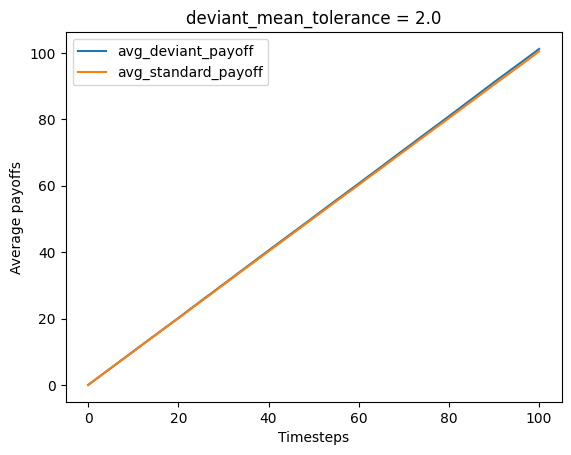

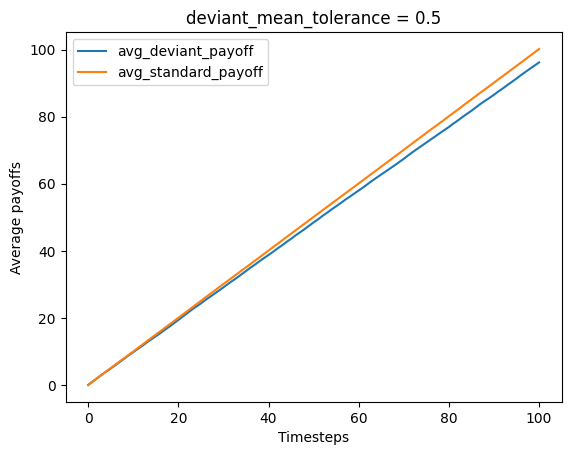

In [77]:
sort_by_sweep(time_df,interested_independent_variable, interested_dependent_variable, 101)

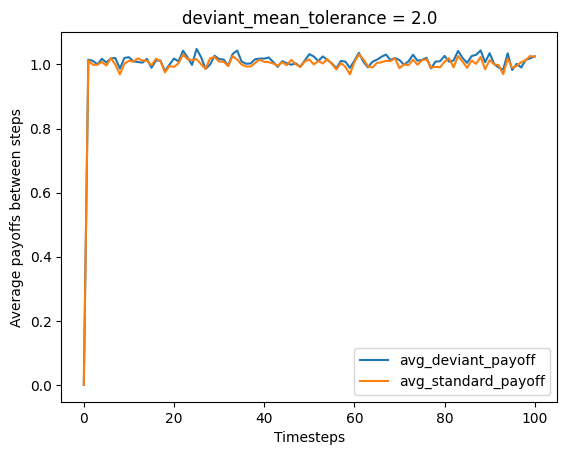

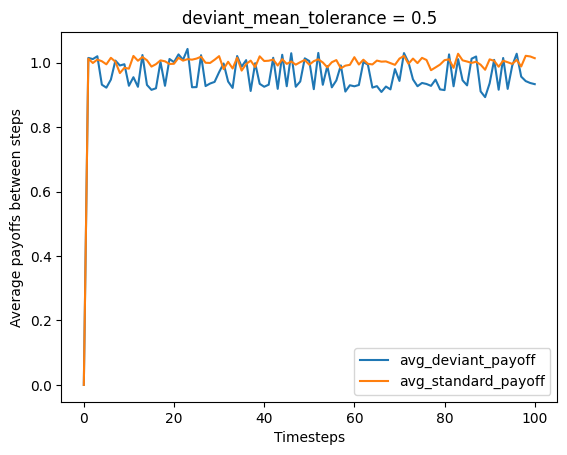

In [80]:
sort_by_sweep_but_relational(time_df,interested_independent_variable, interested_dependent_variable, 101)